In [30]:
!pip install xgboost

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
# raw_data 사용시(= 각 행 마지막 index == label)
# ML 사용

raw_data = np.concatenate([
                       np.load('/content/drive/MyDrive/Mediapipe data/raw_paper_1634267024.npy'),
                       np.load('/content/drive/MyDrive/Mediapipe data/raw_rock_1634267024.npy'),
                       np.load('/content/drive/MyDrive/Mediapipe data/raw_scissors_1634267024.npy')
], axis=0)

print(raw_data.shape)
print(raw_data)
'''
  rock (901, 100)

  scissors (902, 100)

  paper (893, 100)
'''

(2696, 100)
[[ 0.75446624  1.01397312  0.         ...  6.92810869  3.24649644
   2.        ]
 [ 0.75066137  1.03775978  0.         ...  5.2918396   2.79375291
   2.        ]
 [ 0.7480461   1.05291021  0.         ...  3.67776084  3.28804088
   2.        ]
 ...
 [ 0.81067729  0.87604946  0.         ... 62.38299179 16.34757614
   1.        ]
 [ 0.81032497  0.87931526  0.         ... 63.03445435 16.04698563
   1.        ]
 [ 0.81038213  0.88047075  0.         ... 61.13607788 20.14011192
   1.        ]]


'\n  rock (901, 100)\n\n  scissors (902, 100)\n\n  paper (893, 100)\n'

In [23]:
# features와 target 분리
feature = raw_data[:, :-1]
target= raw_data[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=1)

print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(2156, 99) (2156,)

(540, 99) (540,)


In [37]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'xgb':make_pipeline(StandardScaler(), XGBClassifier()),
}

In [38]:
fit_models= {}
for models, pipeline in pipelines.items():
  model = pipeline.fit(X_train, y_train)
  fit_models[models] = model

In [39]:
fit_models

{'lr': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('logisticregression',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), 'rc': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('ridgeclassifier',
                  RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                  fit_interc

In [40]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, multilabel_confusion_matrix
# 모두 정확도가 100프로
for i, train_model in fit_models.items():
  pred = train_model.predict(X_test)
  print(i, accuracy_score(y_test, pred))

lr 1.0
rc 1.0
rf 1.0
xgb 1.0


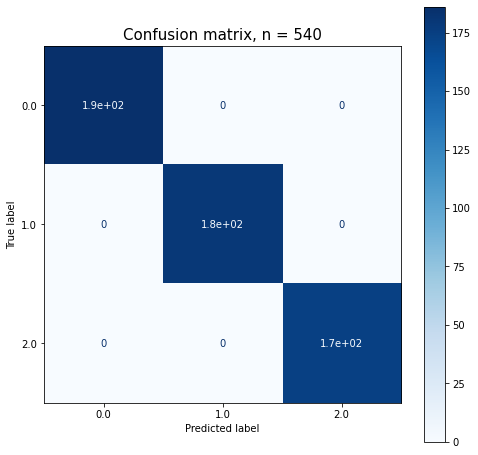

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

pcm = plot_confusion_matrix(fit_models['rf'], X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [52]:
y_pred = fit_models['rf'].predict(X_test)
multilabel_confusion_matrix(y_test, y_pred)

array([[[354,   0],
        [  0, 186]],

       [[360,   0],
        [  0, 180]],

       [[366,   0],
        [  0, 174]]])

In [53]:
y_pred

array([0., 0., 2., 1., 0., 2., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       2., 2., 1., 1., 0., 1., 0., 2., 2., 0., 1., 1., 2., 0., 1., 2., 0.,
       2., 2., 0., 1., 1., 0., 0., 2., 0., 1., 2., 1., 1., 0., 1., 0., 2.,
       0., 1., 0., 2., 2., 1., 1., 1., 2., 1., 0., 2., 1., 1., 0., 1., 0.,
       0., 2., 0., 2., 0., 1., 1., 2., 1., 1., 2., 0., 1., 2., 2., 2., 0.,
       1., 0., 1., 1., 2., 0., 0., 1., 2., 1., 2., 0., 2., 1., 1., 2., 0.,
       0., 1., 0., 0., 2., 2., 1., 1., 2., 0., 0., 0., 1., 1., 1., 0., 2.,
       2., 0., 2., 1., 0., 2., 0., 2., 1., 0., 2., 1., 2., 0., 2., 1., 1.,
       1., 0., 1., 0., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0., 2., 1., 1.,
       2., 1., 1., 0., 1., 2., 2., 1., 1., 1., 2., 2., 1., 0., 0., 2., 1.,
       1., 0., 0., 0., 0., 1., 1., 2., 2., 2., 0., 0., 1., 2., 0., 1., 0.,
       2., 2., 1., 0., 0., 2., 1., 2., 2., 1., 2., 2., 2., 1., 0., 0., 1.,
       0., 1., 2., 2., 0., 1., 0., 0., 0., 2., 0., 1., 0., 1., 0., 1., 2.,
       0., 0., 0., 2., 2.

In [54]:
# 파일 저장
import pickle

with open('rf.pkl', 'wb') as f: # wb = 바이너리 쓰기모드
  pickle.dump(fit_models['rf'], f)